#### 3.4.3 Manifold Learning with t-SNE
- Manifold (다양체)
  - In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point.
  - 국소적으로 유클리드 공간과 닮은 위상 공간<br/><br/>
  
- Manifold Learning $\sim$ Nonlinear dimensionality reduction
  - 시각화가 주 목적
  - 주성분으로 2개 (또는 3개)만 주로 산출
    - 기존 원본 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
  - 대표적인 알고리즘: t-SNE (Stochastic Neighbor Embedding)
    - 1) 각 원본 데이터를 2차원 공간에 무작위로 표현
    - 2) 원본 특성 공간에서 가까운 포인트는 보다 가깝게, 멀리 떨어진 포인트는 보다 멀어지게 만듦
    - 3) 멀리 떨어진 포인트들간의 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둠.
  - 탐색적 데이터 분석에 활용

- scikit-learn의 손글씨 데이터셋
  - 1797개의 8x8 흑백 숫자 이미지

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

digits.data.shape: (1797, 64)


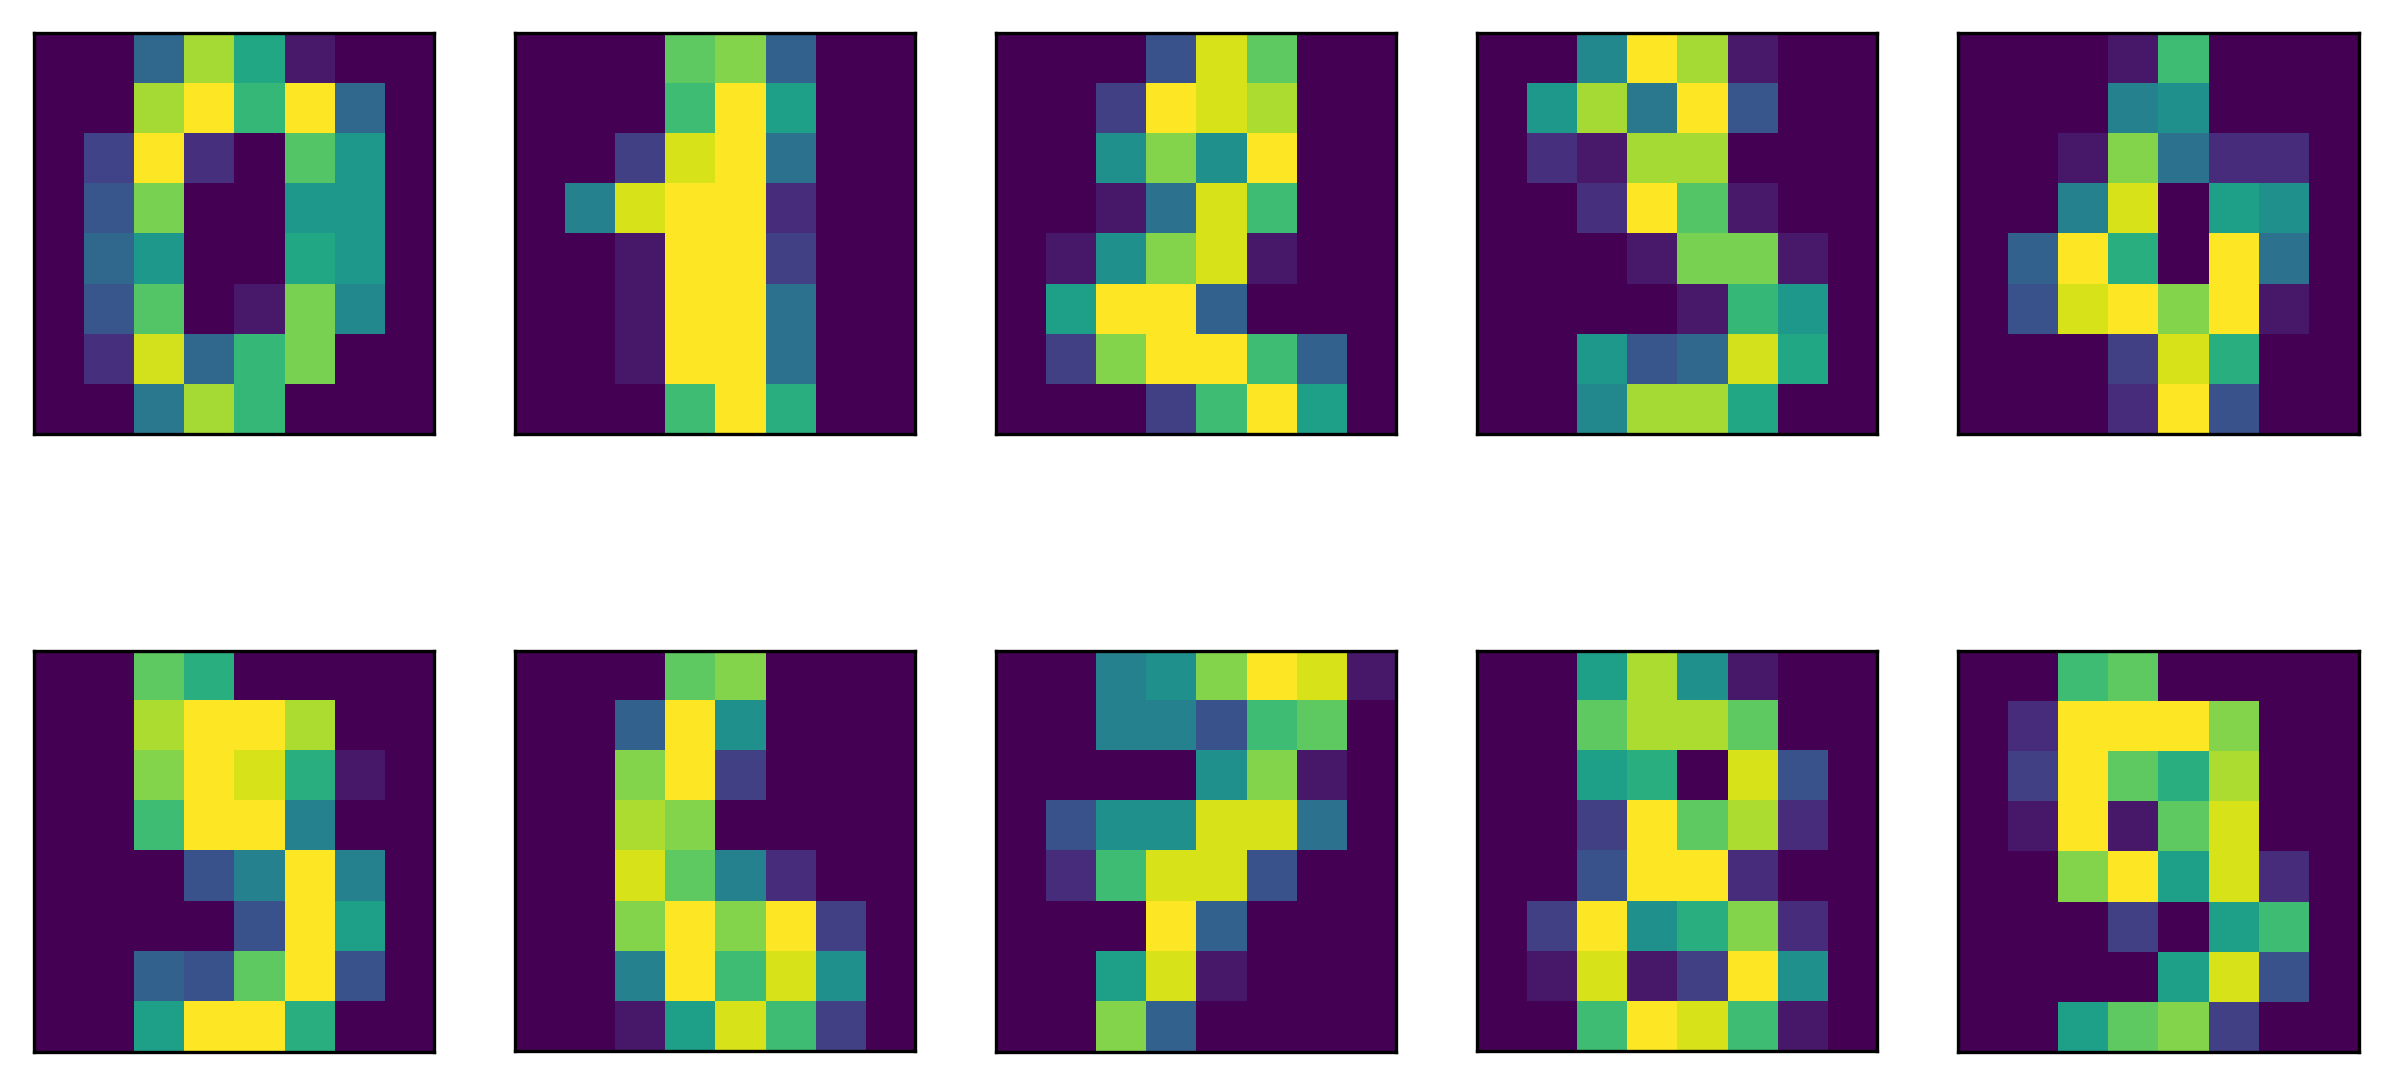

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print("digits.data.shape: {0}".format(digits.data.shape))

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0,0.5,'Second principal component')

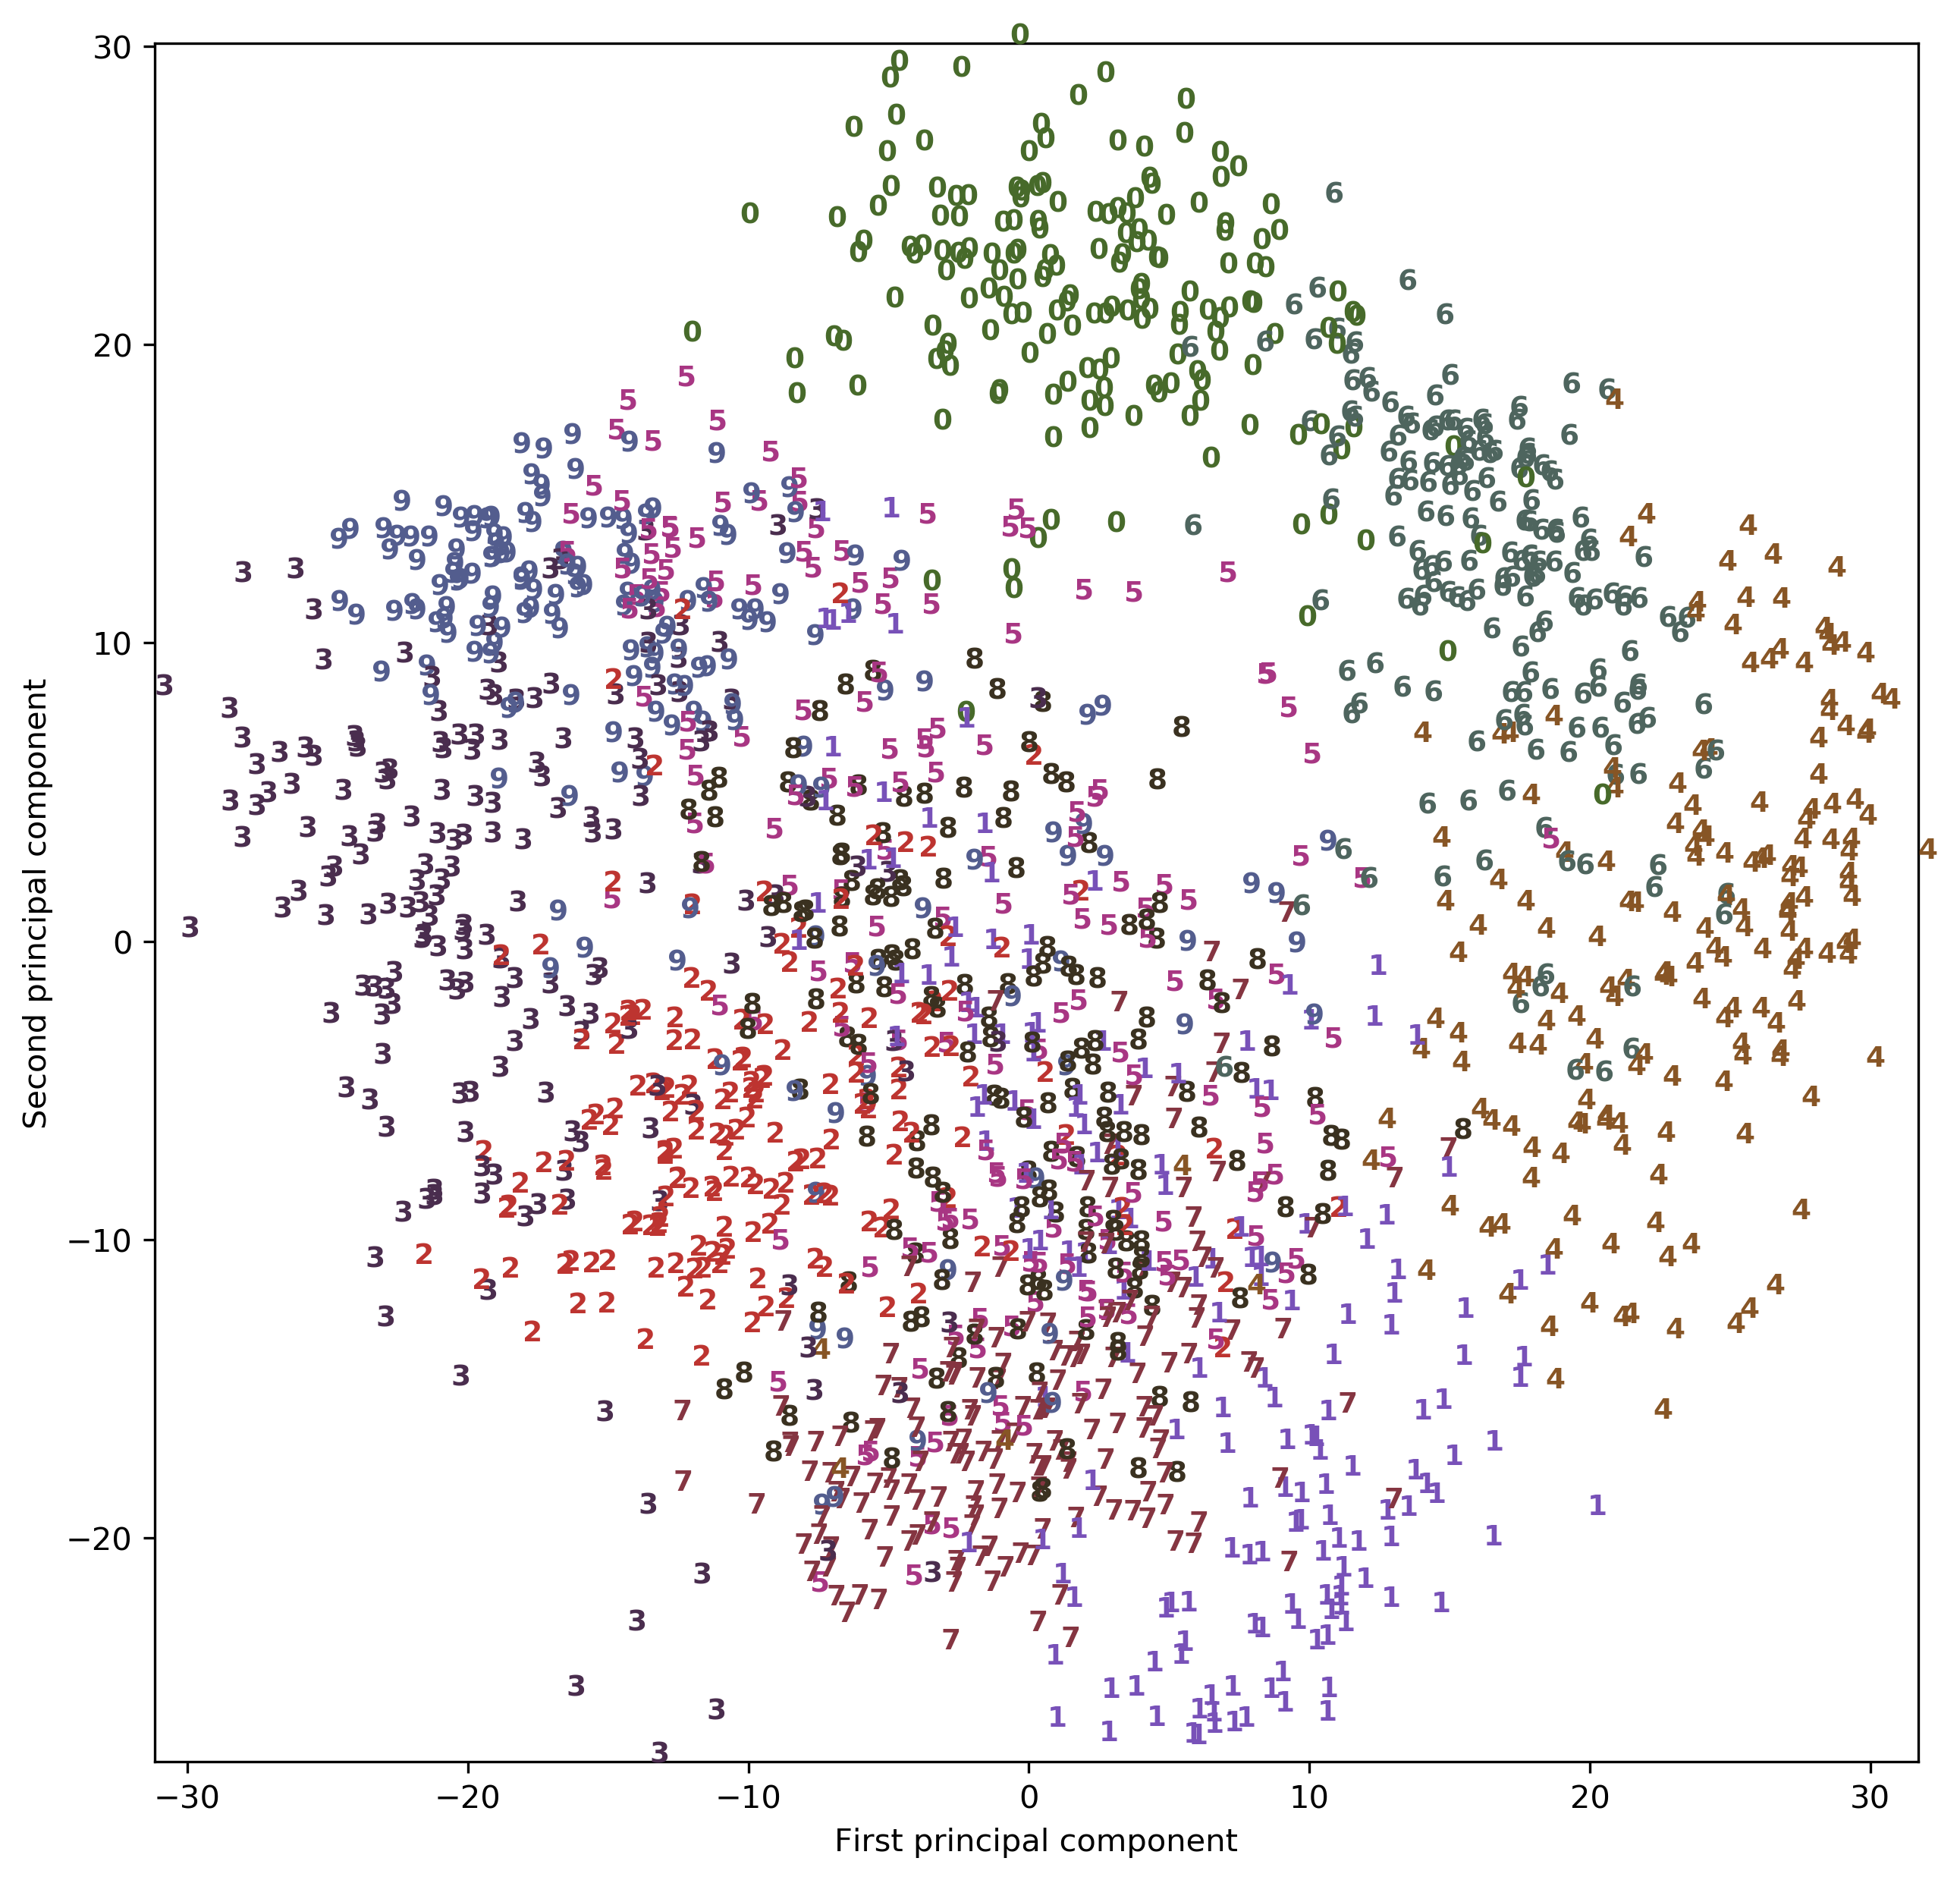

In [5]:
from sklearn.decomposition import PCA

# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5,0,'t-SNE feature 1')

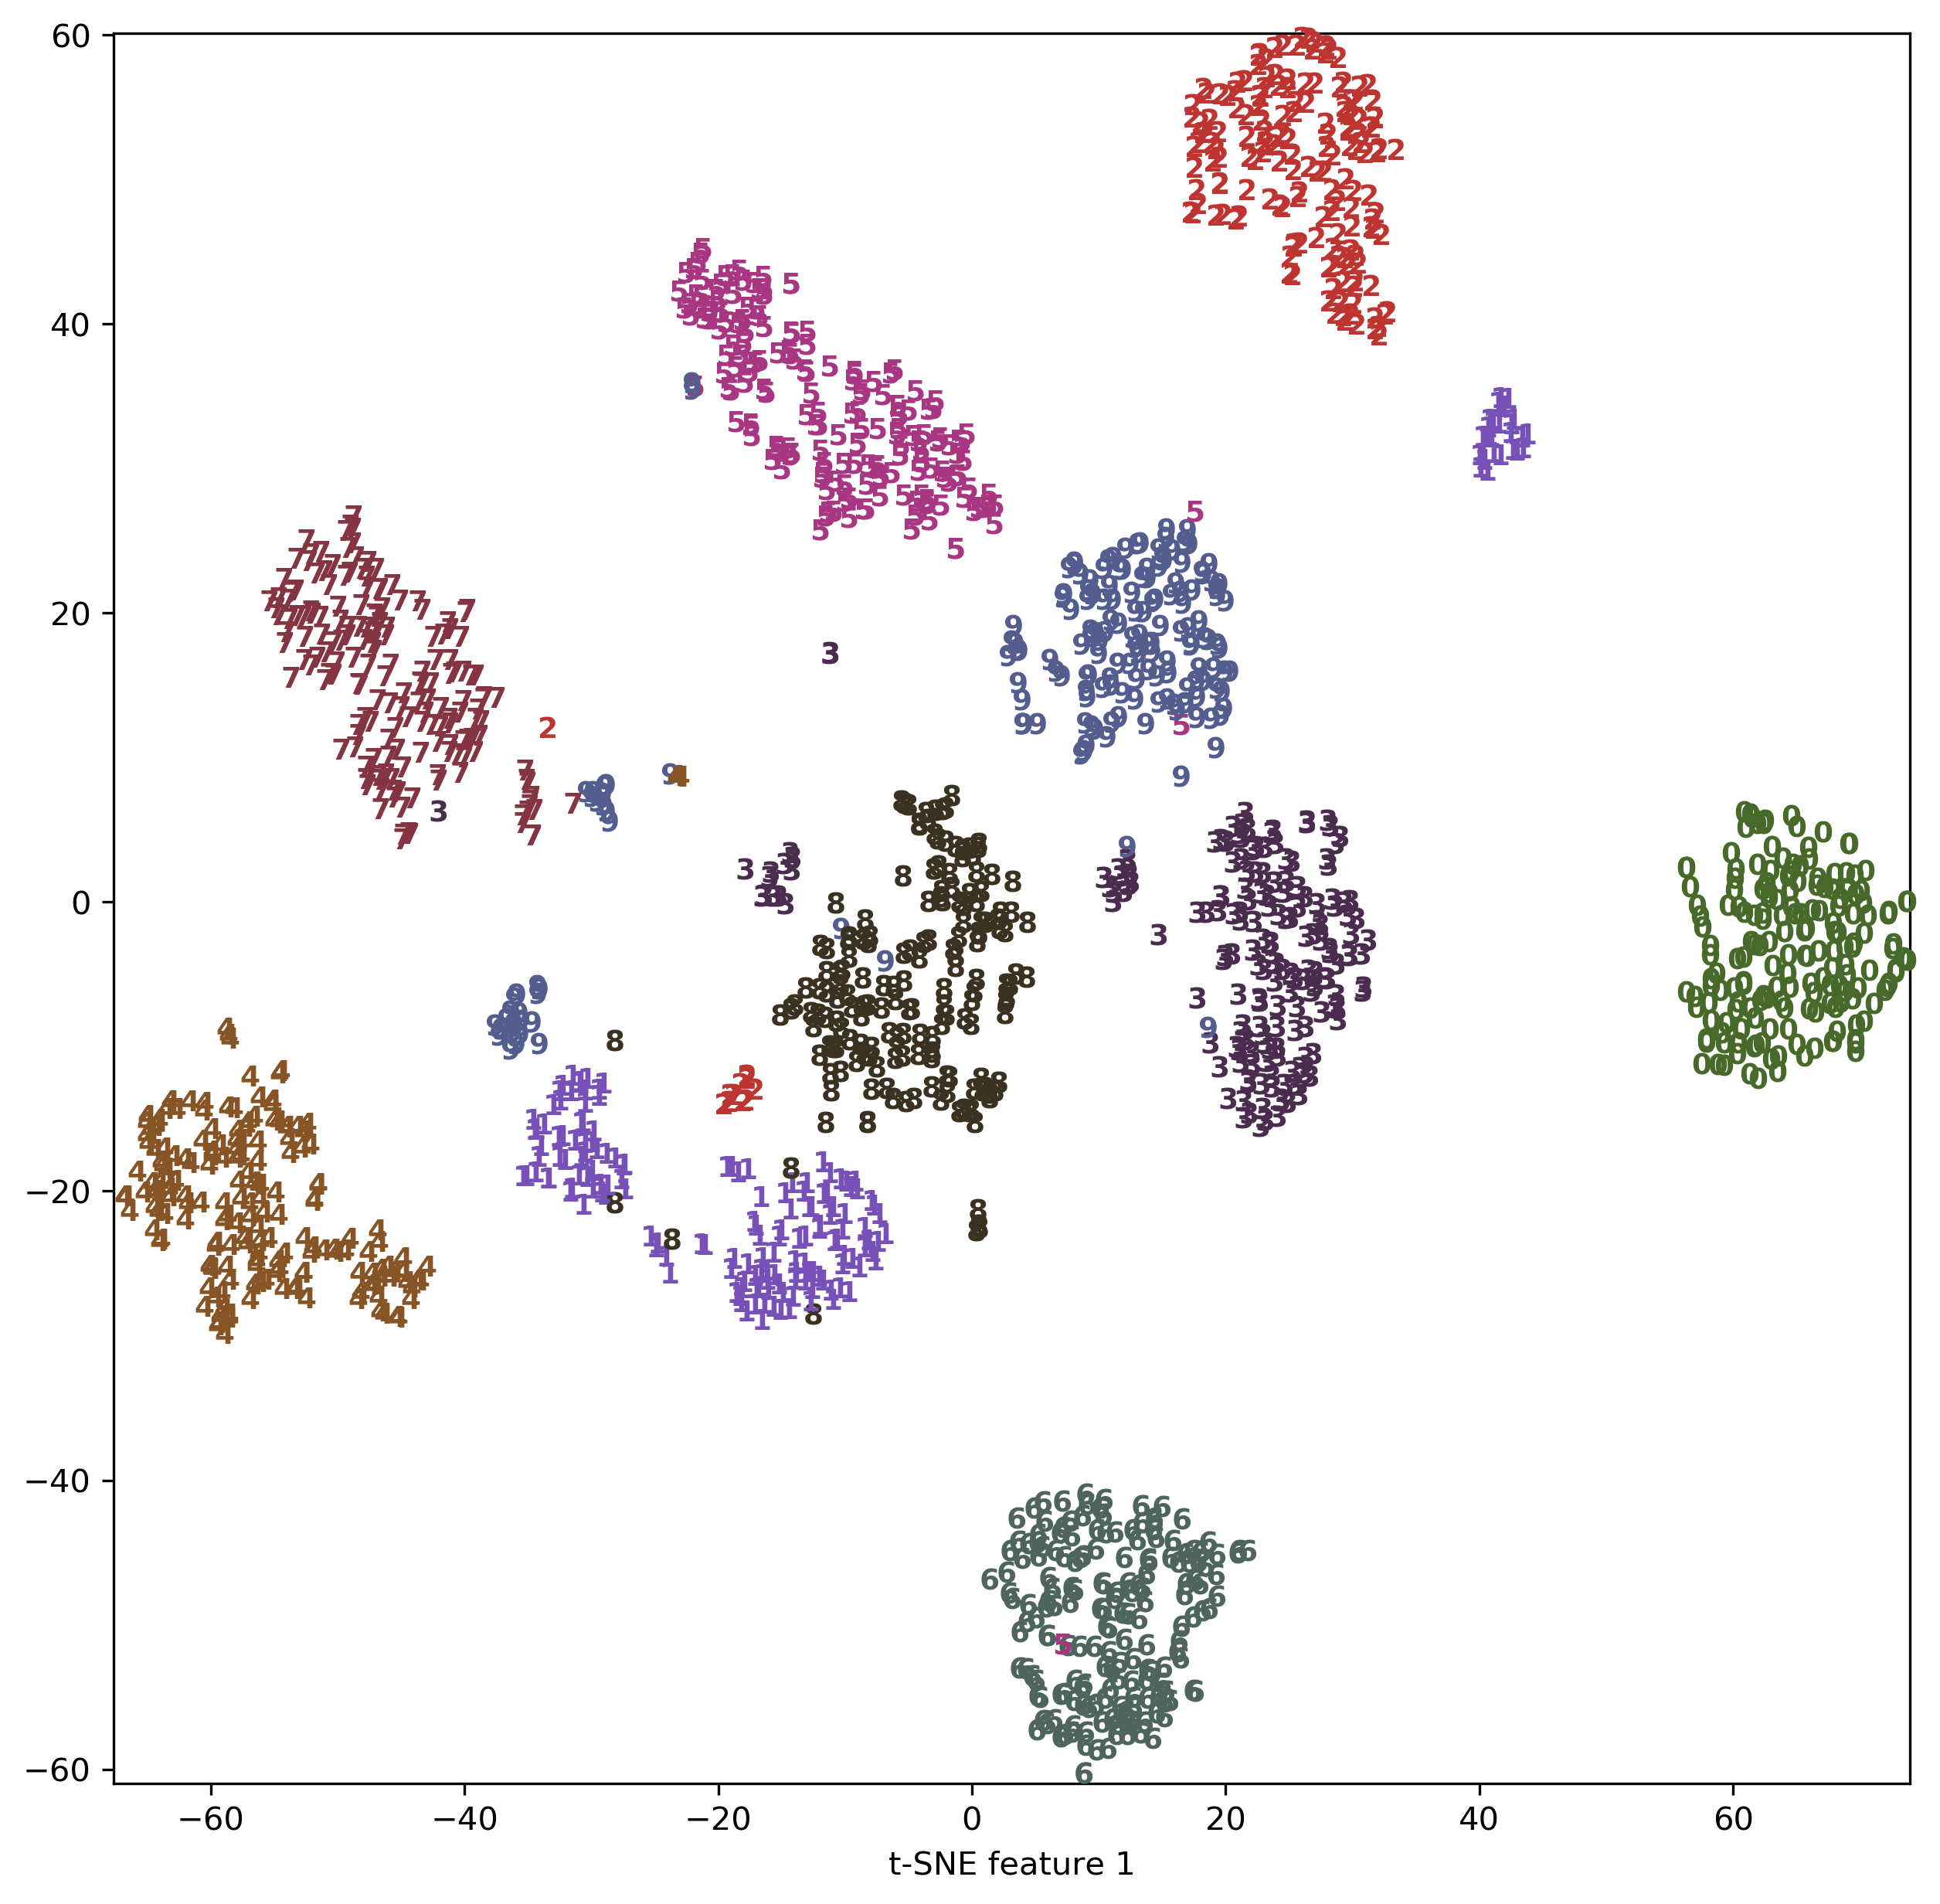

In [7]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")